# Convolutional Neural Network

### Importing the libraries

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator 
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
from PIL import ImageOps

In [9]:
tf.__version__

'2.4.1'

# DATA EXPLORATION 


In [11]:
first = plt.imread('/content/drive/MyDrive/Training/Fire/resized_frame1.jpg')
dims = np.shape(first)
print(dims)

print(first)


(254, 254, 3)
[[[24 25 19]
  [23 24 18]
  [23 24 16]
  ...
  [79 84 77]
  [54 59 52]
  [24 29 22]]

 [[24 25 19]
  [20 21 15]
  [20 21 13]
  ...
  [40 45 38]
  [59 64 57]
  [32 37 30]]

 [[22 23 17]
  [20 21 15]
  [21 22 14]
  ...
  [53 58 52]
  [56 61 55]
  [64 69 62]]

 ...

 [[22 17 11]
  [23 18 12]
  [36 31 25]
  ...
  [20 18 19]
  [24 22 23]
  [42 40 41]]

 [[29 21 18]
  [29 21 18]
  [37 30 24]
  ...
  [22 20 21]
  [28 26 27]
  [58 56 57]]

 [[33 25 22]
  [33 25 22]
  [38 30 27]
  ...
  [25 23 24]
  [29 27 28]
  [64 62 63]]]


In [12]:
np.min(first), np.max(first)

(0, 249)

In [13]:
pixel_matrix = np.reshape(first, (dims[0] * dims[1], dims[2]))
print(np.shape(pixel_matrix))

(64516, 3)


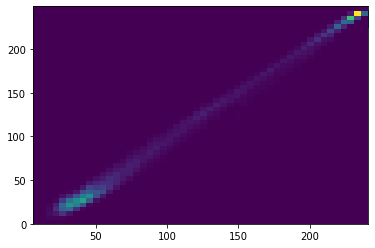

In [14]:
plt.scatter(pixel_matrix[:,0], pixel_matrix[:,1])
_ = plt.hist2d(pixel_matrix[:,1], pixel_matrix[:,2], bins=(50,50))

# Data Preprocessing

### Preprocessing the Training set

In [24]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split=0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True
                                   )
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Training',
                                                  target_size = (254, 254),
                                                 batch_size = 32,
                                                 class_mode = 'binary',
                                                 subset='training') 

validation_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Training',
                                                 target_size = (254, 254),
                                                 batch_size = 32,
                                                 class_mode = 'binary',
                                                 subset='validation')



Found 31501 images belonging to 2 classes.
Found 7874 images belonging to 2 classes.


### Preprocessing the Test set

In [25]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Test',
                                            target_size = (254, 254),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 8617 images belonging to 2 classes.


##   Building the CNN

### Initialising the CNN

In [26]:
cnn = tf.keras.models.Sequential()

### Convolution

In [27]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=[254, 254, 3]))

### Step 2 - Pooling

In [28]:
cnn.add(tf.keras.layers.MaxPool2D(2,2))

### Adding a second convolutional layer

In [29]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(2,2))

### Step 3 - Flattening

In [30]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [31]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [32]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [33]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [ ]:
cnn.fit( training_set, validation_data = validation_set, epochs = 15)